# Problem Set 3, due October 1 at 11:59pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
# load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

## Side note: 
You can use the IPython to easily debug your code. Just add the line IPython.embed() as a break point at some place in
your code and it will give you access to a Python terminal where you can view the values that specific variables get, their dimensions etc. The pdb package in Python is also similar to IPython. 

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function (other than sqrt) to compute RMSE.



In [3]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((2,2,3),(0,2,6)))
2.08
"""
import math 

def compute_rmse(predictions, yvalues):
    # your code here
    predictions = np.array(predictions) # convert the given tuple or list to numpy array
    yvalues = np.array(yvalues) # convert the given tuple or list to numpy array
    sse = ((predictions - yvalues)**2).sum() # compute the sum of squared errors 
    rmse = np.sqrt(sse/float(len(yvalues))) # compute the root mean squared error
    return rmse

print(compute_rmse((2,2,3),(0,2,6)))


2.0816659994661326


### 1.2 Divide your data into training and testing datasets

Randomly select 80% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 20% in a testing dataset (call this "bdata_test")


In [4]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# enter your code here

# Create the entire dataframe
boston = pd.DataFrame(data)  
boston.columns = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT') 
boston['MEDV'] = target

# Randomly split the data set using random.shuffle
ddata = np.insert(data, data.shape[1], target, axis = 1)
np.random.shuffle(ddata)
bdata_train = ddata[0:int(0.80*len(target)),:]
bdata_test = ddata[int(0.80*len(target)):len(target),:]

# Check the sizes of two data sets
print(len(bdata_train))
print(len(bdata_test))

# Create two separate dataframes for training and test
bdata_train = pd.DataFrame(bdata_train) 
bdata_train.columns = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT', 'MEDV') 
bdata_test = pd.DataFrame(bdata_test) 
bdata_test.columns = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT', 'MEDV') 


404
102


### 1.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Specifically, do the following:
1. Compute the RMSE of the training set.
2. Now compute the RMSE on the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?

In [5]:
# enter your code here
import matplotlib.pyplot as plt
import time

# Compute the predicted values as the mean of the target values of the training data 
start_time = time.time()
pred = np.mean(bdata_train['MEDV'])
print("Running time of the algorithm: %s seconds" % (time.time() - start_time)) # print the running time

# 1. Compute the RMSE of the training data set
rmse_train = compute_rmse(pred, bdata_train['MEDV'])

# 2. Compute the RMSE of the test data set
rmse_test = compute_rmse(pred, bdata_test['MEDV'])

# 3. Compare two RMSE values
print("RMSE of the training data: ", rmse_train)
print("RMSE of the test data: ", rmse_test)

# 4. Create scatter plot
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
plottrain = plt.scatter(bdata_train['MEDV'], np.full(len(bdata_train), pred), color = 'blue')
plottest = plt.scatter(bdata_test['MEDV'], np.full(len(bdata_test), pred), color = 'red')
plt.xlabel('True median value of homes (in $1000s)')
plt.ylabel('Predicted median value of homes (in $1000s)')
plt.legend((plottrain, plottest),
           ('Training instances', 'Test instances'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=12)
plt.show()


Running time of the algorithm: 0.00041794776916503906 seconds
RMSE of the training data:  9.207281207825492
RMSE of the test data:  9.11139618372449


<Figure size 1100x600 with 1 Axes>

*Enter your observations here*

<font color='blue'>*3. As printed above, the RMSE of the training data (computed with respect to the mean target value of the training data), 9.207281, is slightly higher than the RMSE of the test data (again computed with respect to the mean target value of the training data), 9.111396. This is <ins>not</ins> expected because the root mean squared error is expected to be higher when the predicted values for a dataset are based on the mean of a different dataset. Since our prediction values are the mean target values of training dataset, this prediction should have been more accurate and representative for the training dataset compared to the test dataset. However, we cannot observe this fact in our case, and this might be caused by the random splitting of the training and test sets. Although the difference between RMSE values (0.09) is a small difference, this unexpected result can be explained by the effect of randomization. Hence, there may be some variations in the splits.*

*5. It takes 0.0002439 seconds to compute the predicted values for the test data. This is quite a short running time since the only operation that predictor does is computing the mean of the target values of the training data points.*</font> 

### 1.4 Use local linear regression for prediction, and compute RMSE.

Create a model that predicts, for every observation of nitric oxide concentration the median home value using local linear regression
with Epanechnikov kernels (https://en.wikipedia.org/wiki/Kernel_(statistics)).
1. Create a scatter plot of the test and training data sets (use different colors for the two). Add on that plot the fit
that you get from the local linear regression.
2. Tune the smoothing parameter (the window that Epanechnikov kernels are nonegative) so that the RMSE for the test set is low. 


First create a function that implements the Epanechnikov kernel which you will need to weight the data points.

In [6]:
def epan_ker(x0, data_x, gamma):
    '''
    Compute the epanechnikov weights. data_x denote the predictors (nitric oxide levels in our case)
    and target denotes the house median value. The gamma parameter controls the smoothing. 
    Inputs: predictors, targets and smoothing parameter gamma 
    '''
    # your code here
    
    # NOTE: x_0 denotes an input point
    m = data_x.shape[0]
    weights = np.zeros(m)
    for j in range(m):
        if abs(x0 - data_x[j]) <= gamma: 
            weights[j] = 0.75*(1 - (x0 - data_x[j])**2)
        else:
            weights[j] = 0
           
    return weights

Write the main code for local linear regression:


In [7]:
# Here you should include the main code for local linear regression

def lowess(x1, n_train, x2, n_test, y, gammalist):
    y_predicted_train = np.zeros(n_train)
    y_predicted_test = np.zeros(n_test)
    x1.shape = (n_train,1)
    
    # Smoothing parameter tuning
    for gamma in gammalist:
        # Run the algorithm for train data        
        for i in range(n_train):
            weights = epan_ker(x1[i], x1, gamma) # Compute weights of data points from the Epanechnikov kernel 
            w = np.diag(weights)
            y_predicted_train[i] = 1/(x1.T @ w @ x1) * (x1.T @ w @ y) * x1[i]

        # Compute RMSE for train data
        rmse_test2 = compute_rmse(y_predicted_train, y)
        print("Bandwidth: ", gamma)
        print("RMSE of the train data: ", rmse_test2)
        
        # Run the algorithm for test data    
        for j in range(n_test):
            weights2 = epan_ker(x2[j], x1, gamma) # Compute weights of data points from the Epanechnikov kernel 
            w2 = np.diag(weights2)
            y_predicted_test[j] = 1/(x1.T @ w2 @ x1) * (x1.T @ w2 @ y) * x2[j]
    
        # Compute RMSE for test data
        rmse_test3 = compute_rmse(y_predicted_test, bdata_test['MEDV'].values)
        print("RMSE of the test data: ", rmse_test3)
   
        # Plot lowess 
        plot_lowess(bdata_train['NOX'].values, bdata_train['MEDV'].values, bdata_test['NOX'].values, 
                    bdata_test['MEDV'].values, bdata_train['NOX'].values, y_predicted_train).show()


Bandwidth:  0.02
RMSE of the train data:  8.501107791314375
RMSE of the test data:  8.67939972586183


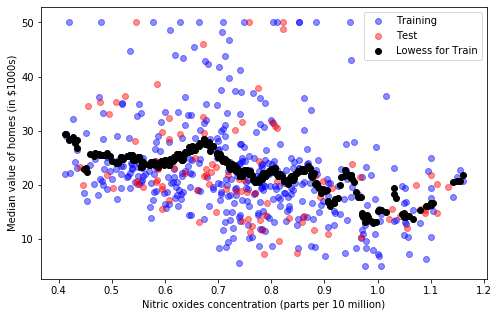

Bandwidth:  0.05
RMSE of the train data:  8.648986921657992
RMSE of the test data:  8.593530635551424


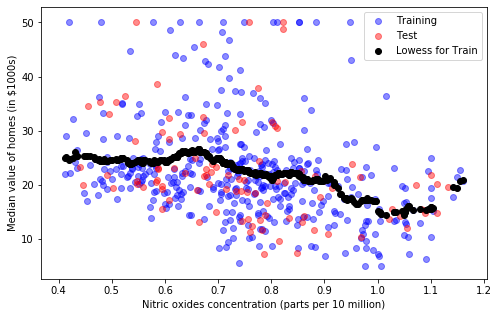

Bandwidth:  0.1
RMSE of the train data:  8.71379636888889
RMSE of the test data:  8.653505462216815


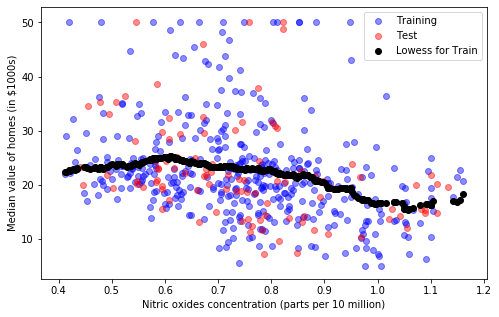

Bandwidth:  0.2
RMSE of the train data:  9.134145122217141
RMSE of the test data:  9.016054842906588


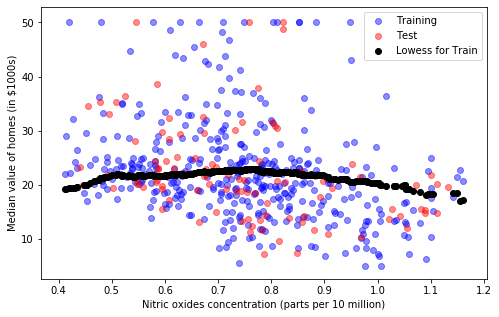

In [8]:
def plot_lowess(x_train, y_train, x_test, y_test, x_plot, y_plot):
    '''
    Scatter plot of data points along with lowess fit.
    Inputs: training and test data points, lowess fitted values
    '''
    # your code here
    plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    plt.scatter(x_train, y_train, color = 'blue', label = 'Training', alpha = 0.45)
    plt.scatter(x_test, y_test, color = 'red', label = 'Test', alpha = 0.45)
    plt.scatter(x_plot, y_plot, color = 'black', label = 'Lowess for Train') 
    plt.xlabel('Nitric oxides concentration (parts per 10 million)')
    plt.ylabel('Median value of homes (in $1000s)')
    plt.legend()
    return plt

# Run the algorithm for all data 
n_train = bdata_train.shape[0]
n_test = bdata_test.shape[0]
y = bdata_train['MEDV'].values
x1 = bdata_train['NOX'].values
x2 = bdata_test['NOX'].values
gammalist = [0.02, 0.05, 0.1, 0.2]

lowess(x1, n_train, x2, n_test, y, gammalist)


<font color='blue'>*As can be seen from the outputs above, among the gamma values that have been tested, the RMSE of the test data is minimized at the smoothing parameter gamma = 0.05.*</font> 

---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).
[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [9]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print(distance((3,4),(6,8),2))
5

"""
def distance(x1, x2, L):
    #your code here
    dists = np.zeros(len(x1))
    x1 = np.array(x1) # convert the given tuple or list to numpy array
    x2 = np.array(x2) # convert the given tuple or list to numpy array
    dists = x1 - x2  
    dists = np.power(np.absolute(dists), L)
    dist = np.power(np.sum(dists),(1/float(L)))
    return dist

print(distance((3,4),(6,8),2))


5.0


### 2.2 Basic Nearest Neighbor algorithm

Your next task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Make sure to do the following
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.4?

Time taken: 0.47374916076660156 seconds
RMSE of the test data:  7.378732023492235
Time taken: 1.8285739421844482 seconds
RMSE of the training data:  0.0


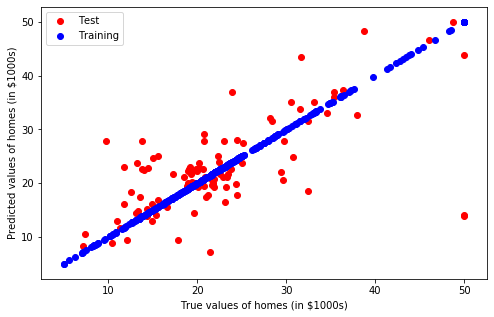

In [10]:
"""
# write your function specification here!

Function
--------
nneighbor
    Given train and test datasets and a value for L, calculate the nearest neighbor (with respect to L-Norm distance measure)
    and return the RMSE value

Parameters
----------
train_set, test_set: array
    Array of numerical values containing the datasets

target_train, target_test: array
    Array of numerical values containing the target values for the datasets
    
L: int
    Value of L to use in computing distances

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction based on nearest neighbors

closest_points: array
    1D array of predicted target values

"""
import time

def nneighbor(train_set, test_set, target_train, target_test, L, k=1):
    start_time = time.time()
    
    #your code here    
    closest_points = [] # initialize the array of predicted values
    target_train = target_train[:, np.newaxis] # increase the dimension of target_train array
    
    for i in range(len(test_set)):
        dist = np.zeros(len(train_set)) # initialize the array of distances
        for k in range(len(train_set)):
            dist[k] = distance(train_set[k], test_set[i], L) # compute the L-norm distances 
        #dist = [(distance(train_set[k], test_set[i], L)) for k in range(len(train_set))]           
        dist = dist[:, np.newaxis] # reshape the distance array 
        distt = np.append(dist, target_train, 1) # concatenate the training target values with the distance array       
        closest = np.argmin(distt[:,0]) # take the index of the closest training point to the test instance 
        y_pred = distt[closest,1] # take target value of the closest training point to the test instance
        closest_points.append(y_pred) # add y_pred to the list of predicted values

    print("Time taken: " + format(time.time() - start_time) + " seconds")
    
    rmse = compute_rmse(np.array(closest_points), target_test) # calculate the rmse
 
    return closest_points, rmse 

#your additional code here
bdata_train2 = np.vstack((bdata_train['CRIM'],bdata_train['RM'])).T
bdata_test2 = np.vstack((bdata_test['CRIM'],bdata_test['RM'])).T

# 2. Predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
nn_pred1, nn_rmse = nneighbor(bdata_train2, bdata_test2, bdata_train['MEDV'].to_numpy(), bdata_test['MEDV'].to_numpy(), 2)
print("RMSE of the test data: ", nn_rmse)

# 3. Predict the median home value of every instance in the training set. Report the RMSE ("training RMSE")
nn_pred2, nn_rmse = nneighbor(bdata_train2, bdata_train2, bdata_train['MEDV'].to_numpy(), bdata_train['MEDV'].to_numpy(), 2)
print("RMSE of the training data: ", nn_rmse)

# 4. Create the scatter plot of true and predicted target values 
plt.figure(figsize=(8,5))
ax = plt.subplot(111)
plt.scatter(bdata_test['MEDV'], nn_pred1, color = 'red', label = 'Test')
plt.scatter(bdata_train['MEDV'], nn_pred2 , color = 'blue', label = 'Training')
plt.xlabel('True values of homes (in $1000s)')
plt.ylabel('Predicted values of homes (in $1000s)')
plt.legend()
plt.show()


*Enter your observations here*
<br/><br/>
<font color='blue'>
*NOTE: Please note that I have used L=2 to compute the distances.*
<br/><br/>
*2. As reported above, the RMSE value for test data is 7.37873.* 
<br/><br/>
*3. As reported above, the RMSE value for training data is 0. This validates that the function nneighbor() has no bugs. This validation can also be done throught the scatter plot where the true values and the predicted values perfectly fit the line with equation y=x.* 
<br/><br/>
*5. As reported above, the total time taken by the code to predict the nearest neighbors for all the values in the test data set is 0.46350 seconds.*
<br/><br/>
*6. In terms of the RMSE value of the test data, the RMSE of nearest neighbors algorithm (7.37873) is much lower than the RMSE of the baseline prediction (9.11139) from part 1.3. However, in terms of the total runtime, the runtime of the nearest neighbors algorithm (0.46350 seconds) is much higher than the runtime of the baseline prediction (0.0002439 seconds). This is the tradeoff between the computation time efficiency and the accuracy of a prediction algorithm. Although the nearest neighbors algorithm is better with respect to the prediction accuracy, the baseline prediction is better with respect to the computation time.*
</font> 

### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

*NOTE 2*: In this case, there might not be a major impact on RMSE; don't get confused if you find that to be the case.

In [11]:
"""
# write your function specification here!

Function
--------
normalize
    Given an array of values for a given feature, returns the normalized value of the array as:
    x = (x - mean(array(x)))/std(array(x))

Parameters
----------
data : array
    1D array of values for a given feature which is to be normalized

Returns
-------
normalized_data : array
    1D array of normalized values 
"""

def normalize(data):
    #your code here
    normalized_data = (data-np.mean(data))/float(np.std(data))
    return normalized_data

#your additional code here

# Separately normalize each dataset using the respective mean and standard deviation
train_normalized = np.vstack((normalize(bdata_train2[:,0]),normalize(bdata_train2[:,1]))).T
test_normalized = np.vstack((normalize(bdata_test2[:,0]),normalize(bdata_test2[:,1]))).T

# Re-run the Nearest Neighbor algorithm on the normalized dataset
nn_rmse_norm = nneighbor(train_normalized, test_normalized, bdata_train['MEDV'].to_numpy(), bdata_test['MEDV'].to_numpy(), 2)[1]
print('RMSE of the Nearest Neighbor algorithm on the normalized dataset: ', nn_rmse_norm)



Time taken: 0.4842660427093506 seconds
RMSE of the Nearest Neighbor algorithm on the normalized dataset:  7.620721236002715


*enter your observations here*

<font color='blue'>*Normalizing the numerical features is a way of handling the curse of dimensionality. In general, the nearest neighbor algorithm works better when all the features are on the same scale since the accuracy of the calculated distances between data points gets better. However, we observe a higher RMSE when we normalized the values of the features used in the model. This is not expected since the error should be lower with the normalized data.  This might be caused by the random splitting of the training and test sets. Due to the effect of randomization, there may be some variations in the splits.*
    
*If we compare the RMSE value of the NN algorithm with the normalized data with the RMSE values of the local linear regression (in part 1.4) and the baseline prediction (in part 1.3), we can see that the NN algorithm with the normalized data gives the lowest error for the test data. The RMSE value of the local linear regression was 8.59353 for gamma=0.05, and the RMSE value of the baseline prediction was 9.11139.*
<font>

### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, you should use normalized features

In [12]:
# enter your code here

import itertools
from itertools import combinations

L_list = [2,3,4,5]
rmse_list = np.full((6, 13, 13), 30, dtype = float)

for k in L_list: # try 4 different values for L 
    print("L = " + str(k) + ":")
    for i, j in list(combinations(np.arange(0,13,3), 2)): # try different combinations of 2 features 
        train2_normalized = np.vstack((normalize(bdata_train[boston.columns[i]]), normalize(bdata_train[boston.columns[j]]))).T
        test2_normalized = np.vstack((normalize(bdata_test[boston.columns[i]]), normalize(bdata_test[boston.columns[j]]))).T
        nn_rmse_norm2 = nneighbor(train2_normalized, test2_normalized, bdata_train['MEDV'].to_numpy(), bdata_test['MEDV'].to_numpy(), k)[1]
        rmse_list[k][i][j] = nn_rmse_norm2
print("\n")

# Print some instances
print("RMSE of the NN for L = 2 and features CRIM and LSTAT: " + str(rmse_list[2][0][12]))
print("RMSE of the NN for L = 3 and features CRIM and LSTAT: " + str(rmse_list[3][0][12]))
print("RMSE of the NN for L = 4 and features CRIM and LSTAT: " + str(rmse_list[4][0][12]))
print("RMSE of the NN for L = 5 and features CRIM and LSTAT: " + str(rmse_list[5][0][12]))
print("\n")

# Print the combination of features and distance function that provide the lowest RMSE
opt = np.unravel_index(np.argmin(rmse_list, axis=None), rmse_list.shape) # get the indices
print("Minimum RMSE is " + str(rmse_list.min()) + " for L = " + str(opt[0]) + " and features "+ str(boston.columns[opt[1]]) + " and " + str(boston.columns[opt[2]]))
print("\n")

# Try a model with 5 features 
rmse_list2 = np.full(6, 10, dtype = float)

for k in L_list: # try 4 different values for L 
    train3_normalized = np.vstack((normalize(bdata_train['CRIM']), normalize(bdata_train['CHAS']), normalize(bdata_train['NOX'].values.T), normalize(bdata_train['RM']), normalize(bdata_train['LSTAT']))).T
    test3_normalized = np.vstack((normalize(bdata_test['CRIM']), normalize(bdata_test['CHAS']), normalize(bdata_test['NOX']), normalize(bdata_test['RM']), normalize(bdata_test['LSTAT']))).T
    nn_rmse_norm3 = nneighbor(train3_normalized, test3_normalized, bdata_train['MEDV'].to_numpy(), bdata_test['MEDV'].to_numpy(), k)[1]        
    rmse_list2[k] = nn_rmse_norm3
    print("RMSE of the NN for L = " + str(k) + " and features CRIM, CHAS, NOX, RM, LSTAT: " + str(nn_rmse_norm3))

# Print the distance function that provide the lowest RMSE
opt2 = np.argmin(rmse_list2) # get the indices
print("\n")
print("Minimum RMSE is " + str(rmse_list2.min()) + " for L = " + str(opt2) + " and features CRIM, CHAS, NOX, RM, LSTAT")


L = 2:
Time taken: 0.46890902519226074 seconds
Time taken: 0.47850894927978516 seconds
Time taken: 0.4777638912200928 seconds
Time taken: 0.4810318946838379 seconds
Time taken: 0.4781160354614258 seconds
Time taken: 0.4554779529571533 seconds
Time taken: 0.4760739803314209 seconds
Time taken: 0.4783318042755127 seconds
Time taken: 0.48391222953796387 seconds
Time taken: 0.5212559700012207 seconds
L = 3:
Time taken: 0.4969468116760254 seconds
Time taken: 0.4969611167907715 seconds
Time taken: 0.49521899223327637 seconds
Time taken: 0.4892699718475342 seconds
Time taken: 0.5040121078491211 seconds
Time taken: 0.4661750793457031 seconds
Time taken: 0.48557305335998535 seconds
Time taken: 0.4911632537841797 seconds
Time taken: 0.48952198028564453 seconds
Time taken: 0.5038211345672607 seconds
L = 4:
Time taken: 0.4941868782043457 seconds
Time taken: 0.47113704681396484 seconds
Time taken: 0.487720251083374 seconds
Time taken: 0.5079879760742188 seconds
Time taken: 0.49273085594177246 secon

*enter your observations here*
<br/><br/>
<font color='blue'> 
*For two-feature model, the lowest RMSE is achieved with the features CHAS and LSTAT and the distance function L=2.*
<br/><br/>
*For five-feature model with features CRIM, CHAS, NOX, RM, and LSTAT, the lowest RMSE is achieved with the distance function L=2.*
<br/><br/>
*Effect of L on the running time: As the L value increases, the running time of the NN algorithm either slightly decreases or slightly increases for different combination of features. Hence, we can conclude that the running time is not affected by the choice of L value <ins>on the average</ins>.*
<br/><br/>
*Effect of the number of features on the running time: As the number of features in the model increases from 2 to 5, we see that the running time does not change significantly.*
<br/><br/>
*Effect of L on the RMSE value: For the two-feature model, we see that the RMSE value decreases as we increase L from 2 to 3. But, then it significantly increases for L = 4 and 5. For the five-feature model, we see that the RMSE value increases as L increases from 2 to 4. However, it decreases when we further increase L from 4 to 5. Hence, from these instances, we observe that larger L values might provide lower errors for the models with higher number of features.*
<br/><br/>
*Effect of the number of features on the RMSE value: We can see that RMSE values are lower when we include more features in our prediction model. For instance, for L=4, the RMSE value with the features CRIM and LSTAT is computed as 7.856301. When we add the features CHAS, NOX and RM, the RMSE value decreases to 6.03662.*
<font>

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  One solution to this sort of overfitting is to use cross-validation (see K-fold [cross-validation][1].  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations. What do you observe?
[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [13]:
# enter your code here

# Function to get indices of k-fold data
def partition(llist, n):
    for i in range(0, len(llist), n):
        yield llist[i:i+n]

# Function for K-fold cross validation 
def K_CV(input_data, function, target, K, L, k=1):
    start_time = time.time()
    
    # Create buckets of indices
    buckets = list(partition(range(len(input_data)),int(len(input_data)/(K-1))))
     
    rmse_list = [] # initialize list of rmse values 
    
    # Randomly split the dataset into train data (K-1 samples) and test data (1 sample)
    for i in range(K):
        test_indices = buckets[i] # assign the indices of the test data points
        train_indices = [j for j in range(len(input_data)) if j not in test_indices] # assign the remaining indices as training data
        
        train = input_data[train_indices,:] # create the training feature set
        target_train = target[train_indices] # create the training target set
        test = input_data[test_indices,:] # create the test feature set
        target_test = target[test_indices] # create the test target set
        
        # Calculate the RMSE of each of the k-folds using the function specified at the input
        rmse_list.append(function(train, test, target_train, target_test, L, k)[1]) 
            
    # Pring the average RMSE for K-fold CV
    print("Average RMSE for NN using Euclidean distance is: ", str(np.mean(rmse_list)))

    # Total running time for the full run of K folds
    print("Total Time taken for K-fold CV ", str(time.time()-start_time), " seconds")
    
    # Return the average RMSE for K-fold CV
    return np.mean(rmse_list)     
       
# Create the normalized input dataset with features CRIM and RM 
input_data = np.vstack((normalize(boston['CRIM']), normalize(boston['RM']))).T

# Perform K-fold CV for Nearest Neighbors
print("Output of 10-fold CV for Nearest Neighbors using Euclidean distance with normalized CRIM and RM input features: \n")
K_CV(input_data, nneighbor, boston['MEDV'].to_numpy(), 10, 2, 1)


Output of 10-fold CV for Nearest Neighbors using Euclidean distance with normalized CRIM and RM input features: 

Time taken: 0.30307912826538086 seconds
Time taken: 0.28110790252685547 seconds
Time taken: 0.3024718761444092 seconds
Time taken: 0.3196530342102051 seconds
Time taken: 0.29019594192504883 seconds
Time taken: 0.2989959716796875 seconds
Time taken: 0.313201904296875 seconds
Time taken: 0.29003190994262695 seconds
Time taken: 0.3241591453552246 seconds
Time taken: 0.015619993209838867 seconds
Average RMSE for NN using Euclidean distance is:  7.888333790863993
Total Time taken for K-fold CV  2.7431540489196777  seconds


7.888333790863993

*enter your observations here*
<br/><br/>
<font color='blue'> 
*In part 2.3, we performed the Nearest Neighbor algorithm on the normalized dataset with the features CRIM and RM, and the RMSE was computed as 7.62072123. Here, we perform the same operation with 10 different splits of training and test datasets and the average RMSE turns out to be 7.888333. Although it is a higher value, it provides us a better estimate of the RMSE for our model.* 
<br/><br/>
*Total running time for the full run of 10 folds is 2.931178 seconds which seems to sufficiently efficient for this dataset.*
<font>

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation and L2 normalization, report the RMSE for K=3 and the running time of the algorithm.

In [14]:
"""
# write your function specification here!

Function
--------
knn
    Given train and test datasets and a value for L and k, predict the target value for test by calculating the average of the 
    k-nearest neighbors (with respect to L-Norm distance measure) from the training set and return the RMSE value.

Parameters
----------
train_set, test_set: array
    Array of numerical values containing the datasets

col_num, target : array
    1D arrays specifying the predictors and the target columns in test and train data

L, k: int
    L: Value of L to use in computing L-norm distances
    k: Value of k to use in k-nearest neighbors
    
Returns
-------
rmse : int
    The RMSE value between predicted and original target value based on k nearest neighbors 

predicted_values: array
    1D array of predicted target values
    
"""
def knn(train_set, test_set, target_train, target_test, L, k):  
    # enter your code here
    start_time = time.time()
    predicted_values = np.zeros(len(test_set)) # initialize the list of predicted values for the test data
    target_train = target_train[:, np.newaxis] # increase the dimension of target_train array
    
    for i in range(len(test_set)):
        dist = np.zeros(len(train_set)) # initialize the array of distances
        for h in range(len(train_set)):
            dist[h] = distance(train_set[h], test_set[i], L) # compute the L-norm distances 

        dist = dist[:, np.newaxis] # reshape the distance array 
        distt = np.append(dist, target_train, 1) # concatenate the training target values with the distance array       
        sorted_distt = distt[np.argsort(distt[:,0]),:] # sort the distt array with respect to the first column 
        predicted_values[i] = np.mean(sorted_distt[0:k], axis = 0)[1] # add mean of the k-closest points to the list of predicted values
        
    rmse = compute_rmse(predicted_values, target_test) # calculate the rmse
    print("Time taken: " + format(time.time() - start_time) + " seconds") # print the running time of the algorithm
   
    return predicted_values, rmse
    
# enter your additional code here

# Perform 10-fold CV for KNN (using the normalized input dataset with features CRIM and RM)
print("Output of 10-fold CV for Nearest Neighbors using Euclidean distance with normalized CRIM and RM input features: ")
K_CV(input_data, knn, boston['MEDV'].to_numpy(), 10, 2, 3)


Output of 10-fold CV for Nearest Neighbors using Euclidean distance with normalized CRIM and RM input features: 
Time taken: 0.3117649555206299 seconds
Time taken: 0.28208422660827637 seconds
Time taken: 0.2841801643371582 seconds
Time taken: 0.286395788192749 seconds
Time taken: 0.2867469787597656 seconds
Time taken: 0.2848351001739502 seconds
Time taken: 0.27245116233825684 seconds
Time taken: 0.2817680835723877 seconds
Time taken: 0.27886390686035156 seconds
Time taken: 0.014934062957763672 seconds
Average RMSE for NN using Euclidean distance is:  6.3027435683960205
Total Time taken for K-fold CV  2.5870778560638428  seconds


6.3027435683960205

### 2.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Time taken: 0.28109097480773926 seconds
Time taken: 0.2792949676513672 seconds
Time taken: 0.2815837860107422 seconds
Time taken: 0.282879114151001 seconds
Time taken: 0.28118300437927246 seconds
Time taken: 0.27776193618774414 seconds
Time taken: 0.28764796257019043 seconds
Time taken: 0.2732110023498535 seconds
Time taken: 0.2842528820037842 seconds
Time taken: 0.014147758483886719 seconds
Average RMSE for NN using Euclidean distance is:  6.317336154828449
Total Time taken for K-fold CV  2.5465941429138184  seconds
Time taken: 0.29293203353881836 seconds
Time taken: 0.2746760845184326 seconds
Time taken: 0.2773571014404297 seconds
Time taken: 0.28274989128112793 seconds
Time taken: 0.27840399742126465 seconds
Time taken: 0.2797408103942871 seconds
Time taken: 0.2793889045715332 seconds
Time taken: 0.2837409973144531 seconds
Time taken: 0.27978086471557617 seconds
Time taken: 0.012473106384277344 seconds
Average RMSE for NN using Euclidean distance is:  5.95737302425089
Total Time tak

Time taken: 0.2888808250427246 seconds
Time taken: 0.27434802055358887 seconds
Time taken: 0.277569055557251 seconds
Time taken: 0.27375221252441406 seconds
Time taken: 0.27549266815185547 seconds
Time taken: 0.2753582000732422 seconds
Time taken: 0.2670106887817383 seconds
Time taken: 0.27595067024230957 seconds
Time taken: 0.27347898483276367 seconds
Time taken: 0.014517068862915039 seconds
Average RMSE for NN using Euclidean distance is:  5.898094432941437
Total Time taken for K-fold CV  2.498950242996216  seconds
Time taken: 0.27445101737976074 seconds
Time taken: 0.2750840187072754 seconds
Time taken: 0.26972413063049316 seconds
Time taken: 0.27979183197021484 seconds
Time taken: 0.27227115631103516 seconds
Time taken: 0.2742180824279785 seconds
Time taken: 0.2773137092590332 seconds
Time taken: 0.2754180431365967 seconds
Time taken: 0.2711949348449707 seconds
Time taken: 0.014429092407226562 seconds
Average RMSE for NN using Euclidean distance is:  5.882821950247845
Total Time ta

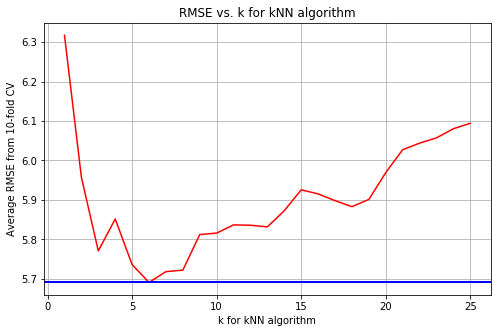

In [15]:
# enter your code here

knn_rmse = np.zeros(25) # initalize list of rmse values 

# Create list of values of k between 1 and 25
k_list = list(range(26))
k_list.remove(0)

# Create the normalized input dataset with features CRIM, ZN, RM, AGE, DIS, TAX
input_data2 = np.vstack((normalize(boston['CRIM']), normalize(boston['ZN']), normalize(boston['RM']), 
                        normalize(boston['AGE']), normalize(boston['DIS']), normalize(boston['TAX']))).T

# Calculate the average RMSE values computed by 10-fold CV for different values of k for kNN
minn = 1000
for i in k_list:
    knn_rmse[i-1] = K_CV(input_data2, knn, boston['MEDV'].to_numpy(), 10, 2, i)
    if knn_rmse[i-1] < minn:
        minn = knn_rmse[i-1]
        best = i

print("\n")
print("The most reasonable choice of k for kNN algorithm for this model: " + str(best))

# Plotting a graph that shows how RMSE changes as K increases
plt.figure(figsize=(8,5))
plot = plt.plot(k_list, knn_rmse, color = 'red') 
plt.axhline(y = knn_rmse[best-1], color = 'blue', linewidth = 2)
plt.title('RMSE vs. k for kNN algorithm')
plt.xlabel('k for kNN algorithm')
plt.ylabel('Average RMSE from 10-fold CV')
plt.grid()
plt.show()


*Enter your observations here*
<br/><br/>
<font color='blue'> 
*For the model with the normalized features CRIM, ZN, RM, AGE, DIS, TAX, the most reasonable choice of k is 6. This can be also seen from the trend in the plot, that is the lowest value of the RMSE (shown by the blue horizontal line) is observed at k=6. As the k value increases from 1 to 3, the RMSE monotonically decreases. At k=4, there is a slight increase in the RMSE value. However, it continues to decrease as k increases from 4 to 6 and reaches its best value at k=6 (hits the blue horizontal line). Then, as k further increases, there is an increasing trend in the plot of the RMSE values on the average.*
<font>

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

/Users/ilgindogan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


Time taken: 0.31620025634765625 seconds
Time taken: 0.3073997497558594 seconds
Time taken: 0.30858278274536133 seconds
Time taken: 0.3013598918914795 seconds
Time taken: 0.30252695083618164 seconds
Time taken: 0.2953531742095947 seconds
Time taken: 0.3134751319885254 seconds
Time taken: 0.3239278793334961 seconds
Time taken: 0.30602502822875977 seconds
Time taken: 0.015018939971923828 seconds
Average RMSE for NN using Euclidean distance is:  8.422036897751799
Total Time taken for K-fold CV  2.7930397987365723  seconds


/Users/ilgindogan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Time taken: 0.3145301342010498 seconds
Time taken: 0.3089771270751953 seconds
Time taken: 0.30918097496032715 seconds
Time taken: 0.2796919345855713 seconds
Time taken: 0.2897000312805176 seconds
Time taken: 0.2986180782318115 seconds
Time taken: 0.2941291332244873 seconds
Time taken: 0.27803611755371094 seconds
Time taken: 0.3007619380950928 seconds
Time taken: 0.013478994369506836 seconds
Average RMSE for NN using Euclidean distance is:  8.505078873136364
Total Time taken for K-fold CV  2.6903228759765625  seconds
Time taken: 0.2899129390716553 seconds
Time taken: 0.28870582580566406 seconds
Time taken: 0.30257105827331543 seconds
Time taken: 0.2897930145263672 seconds
Time taken: 0.3016688823699951 seconds
Time taken: 0.2904818058013916 seconds
Time taken: 0.29104113578796387 seconds
Time taken: 0.30646610260009766 seconds
Time taken: 0.3087341785430908 seconds
Time taken: 0.014882087707519531 seconds
Average RMSE for NN using Euclidean distance is:  7.949170208574844
Total Time tak

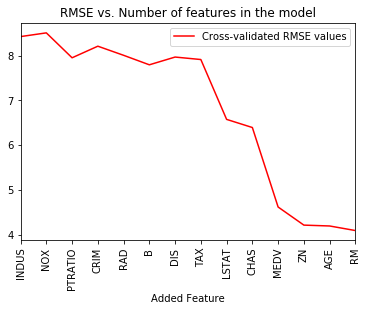

In [18]:
# Fix k at the optimal value from 2.7 
k = 6 

# Initialize the list of features 
all_features = boston.columns.tolist()
selected_features = []

# Compute the cross-validated RMSE values with forward selection
while (len(list(selected_features))<13):
    not_selected_features = list(set(all_features)-set(selected_features))
    rmse_values = pd.Series(index=selected_features) # create a pandas series to be plotted later
    temporary = selected_features  # create a dummy list of features 
    minnn = 1000
    for i in not_selected_features:
        temporary.append(i)
        new_data = np.vstack((normalize(boston[j]) for j in temporary)).T # create the new normalized dataset
        err = K_CV(new_data, knn, boston['MEDV'].to_numpy(), 10, 2, k) # perform 10-fold cross validation with L2 normalization
        if err < minnn:
            selected_features.append(i)
            rmse_values = rmse_values.set_value(i, err)            
   
# Plotting a graph that shows RMSE as a function of the number of features in the model
rmse_values = rmse_values.to_frame()
rmse_values.reset_index(inplace=True)
rmse_values.columns = ['Added Feature', 'Cross-validated RMSE values']
print(rmse_values)
ax = rmse_values.plot(x='Added Feature',y='Cross-validated RMSE values', c='red')
xticks=rmse_values['Added Feature'].values
plt.xticks(range(len(xticks)), xticks, rotation = 'vertical')
plt.title('RMSE vs. Number of features in the model')
plt.show()  
                             